# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [4]:
sinasc_raw['faixa_latitude'] = sinasc_raw['munResLat'].apply(lambda x: 'Acima de -10.5' if x > -10.5 else 'Abaixo de -10.5')


variaveis_numericas = ['PESO', 'APGAR5']


estatisticas = sinasc_raw.groupby('faixa_latitude')[variaveis_numericas].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

estatisticas

PESO                                              \
                      sum         mean  min   max  median         std   
faixa_latitude                                                          
Abaixo de -10.5  42101809  3240.096121  258  5985  3270.0  531.794694   
Acima de -10.5   45555148  3246.055864  295  5190  3275.0  556.487709   

                                  APGAR5                              \
                           var       sum      mean  min   max median   
faixa_latitude                                                         
Abaixo de -10.5  282805.596163  118403.0  9.138855  0.0  10.0    9.0   
Acima de -10.5   309678.570242  128746.0  9.216551  0.0  10.0    9.0   

                                     
                      std       var  
faixa_latitude                       
Abaixo de -10.5  0.805385  0.648645  
Acima de -10.5   0.774741  0.600224

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [6]:

sinasc_raw['faixa_area'] = sinasc_raw['munResArea'].apply(lambda x: 'Acima de 3000' if x > 3000 else 'Abaixo de 3000')

variaveis = ['APGAR1', 'CONSPRENAT']

estatisticas_area = sinasc_raw.groupby('faixa_area')[variaveis].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

estatisticas_area

APGAR1                                                  \
                     sum      mean  min   max median       std       var   
faixa_area                                                                 
Abaixo de 3000   42079.0  8.073484  0.0  10.0    8.0  1.008775  1.017627   
Acima de 3000   177079.0  8.152808  0.0  10.0    8.0  0.978517  0.957495   

               CONSPRENAT                                                   
                      sum      mean  min   max median       std        var  
faixa_area                                                                  
Abaixo de 3000    44775.0  8.707701  0.0  99.0    8.0  4.291319  18.415420  
Acima de 3000    170662.0  8.143825  0.0  99.0    8.0  5.325530  28.361275

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [7]:
sinasc_raw['faixa_altitude'] = pd.cut(
    sinasc_raw['munResAlt'],
    bins=[-100, 100, 300, 500, 1000, 3000],
    labels=['≤100m', '101-300m', '301-500m', '501-1000m', '>1000m']
)

variaveis = ['QTDPARTNOR', 'QTDPARTCES']


resultado = sinasc_raw.groupby('faixa_altitude')[variaveis].agg(
    ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
)

resultado

C:\Users\lukas\AppData\Local\Temp\ipykernel_15064\1734206557.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resultado = sinasc_raw.groupby('faixa_altitude')[variaveis].agg(


QTDPARTNOR                                                  \
                      sum      mean  min   max median       std       var   
faixa_altitude                                                              
≤100m              6128.0  0.804833  0.0  40.0    0.0  1.382272  1.910677   
101-300m           7575.0  0.502821  0.0  41.0    0.0  1.144735  1.310418   
301-500m            346.0  0.391403  0.0   8.0    0.0  0.924423  0.854558   
501-1000m           522.0  0.329338  0.0   9.0    0.0  0.840907  0.707125   
>1000m                0.0       NaN  NaN   NaN    NaN       NaN       NaN   

               QTDPARTCES                                                  
                      sum      mean  min   max median       std       var  
faixa_altitude                                                             
≤100m              3409.0  0.448730  0.0  12.0    0.0  0.735871  0.541506  
101-300m           8316.0  0.548223  0.0  12.0    0.0  0.748107  0.559663  
301-500m            473.0  0.534463  0.0   4.0    0.0  0.747695  0.559048  
501-1000m           938.0  0.591798  0.0   4.0    0.0  0.754152  0.568746  
>1000m                0.0       NaN  NaN   NaN    NaN       NaN       NaN

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


<Figure size 1400x700 with 0 Axes>

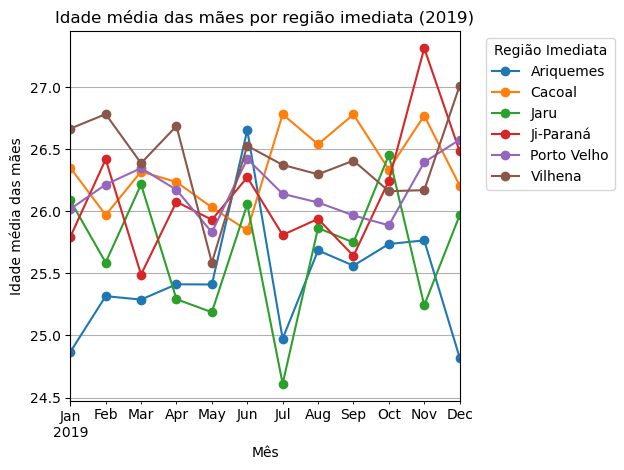

In [8]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}


sinasc_raw["regiao_imediata"] = sinasc_raw["munResNome"].map(imediatas)


sinasc_raw["DTNASC"] = pd.to_datetime(sinasc_raw["DTNASC"], errors='coerce')
sinasc_raw["mes"] = sinasc_raw["DTNASC"].dt.to_period("M")


media_idade = sinasc_raw.groupby(["mes", "regiao_imediata"])["IDADEMAE"].mean().unstack()


plt.figure(figsize=(14, 7))
media_idade.plot(marker='o')
plt.title("Idade média das mães por região imediata (2019)")
plt.xlabel("Mês")
plt.ylabel("Idade média das mães")
plt.legend(title="Região Imediata", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [12]:
url = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M"

tabelas = pd.read_html(url, decimal=",", thousands=".")

tabela_idh = tabelas[0]


tabela_idh.head()

Posição         Município     Dados de 2010                    \
            Posição         Município     IDH municipal         IDH renda   
   IDH-M muito alto  IDH-M muito alto  IDH-M muito alto  IDH-M muito alto   
0  nenhum município  nenhum município  nenhum município  nenhum município   
1        IDH-M alto        IDH-M alto        IDH-M alto        IDH-M alto   
2                 1       Porto Velho              0736              0764   
3                 2           Vilhena              0731              0734   
4                 3            Cacoal              0718              0727   

                                       
    IDH longevidade      IDH educação  
   IDH-M muito alto  IDH-M muito alto  
0  nenhum município  nenhum município  
1        IDH-M alto        IDH-M alto  
2              0819              0638  
3              0808              0659  
4              0821              0620

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [13]:
url_2 = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM"

tabelas_2 = pd.read_html(url_2, decimal=",", thousands=".")

tabela_ifdm = tabelas_2[0]


tabela_ifdm.head()

,Posição,Município,IFDM Consolidado (2013)
,Desenvolvimento alto,Desenvolvimento alto,Desenvolvimento alto
0,nenhum município,nenhum município,nenhum município
1,Desenvolvimento moderado,Desenvolvimento moderado,Desenvolvimento moderado
2,1º,Ariquemes,07746
3,2º,Vilhena,07465
4,3º,Pimenta Bueno,07383


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [14]:
url_3 = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB"

tabelas_3 = pd.read_html(url_3, decimal=",", thousands=".")

tabela_pib = tabelas_3[0]


tabela_pib.head()

Posição                   Município         PIB Alteração
  Em 2019 Mudança (2014)    Município         PIB Alteração
0       1            (0)  Porto Velho  17 912 070       NaN
1       2            (0)    Ji-Paraná   3 783 972       NaN
2       3            (0)      Vilhena   2 831 175       NaN
3       4            (0)    Ariquemes   2 579 830       NaN
4       5            (0)       Cacoal   2 261 644       NaN

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.